In [27]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Load the dataset

In [28]:
df = pd.read_csv('/content/BrentOilPrices.csv', parse_dates=['Date'], index_col='Date')

# Ensure the dataset is sorted by date
df = df.sort_index()

In [29]:
# Normalize the Price column
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled['Price'] = scaler.fit_transform(df[['Price']])

# LSTM Data Preparation
def prepare_lstm_data(series, time_steps=10):
    X, y = [], []
    for i in range(len(series) - time_steps):
        X.append(series[i:i + time_steps])
        y.append(series[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 10
X, y = prepare_lstm_data(df_scaled['Price'].values)
# Reshape X to be 3D (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Train/Test Split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Get corresponding dates for visualization later
dates_test = df.index[split + time_steps:]

# LSTM Model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(time_steps, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0197 - val_loss: 8.3137e-04
Epoch 2/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 3.2014e-04 - val_loss: 7.3048e-04
Epoch 3/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 3.2523e-04 - val_loss: 6.4853e-04
Epoch 4/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 2.7409e-04 - val_loss: 6.0721e-04
Epoch 5/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 2.6098e-04 - val_loss: 9.5236e-04
Epoch 6/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 2.5118e-04 - val_loss: 3.7310e-04
Epoch 7/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 2.0472e-04 - val_loss: 3.3913e-04
Epoch 8/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 1.9195e-04 - val_loss: 4.6900e-04
Epoch 9/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 1.4106e-04 - val_loss: 4.1053e-04
Epoch 10/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 1.8448e-04 - val_loss: 2.8307e-04
Epoch 11/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 1.

Make Predictions

In [30]:
y_pred = model.predict(X_test)

# Inverse transform to get actual price values
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = scaler.inverse_transform(y_pred)

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


Compare Actual vs. Predicted Prices

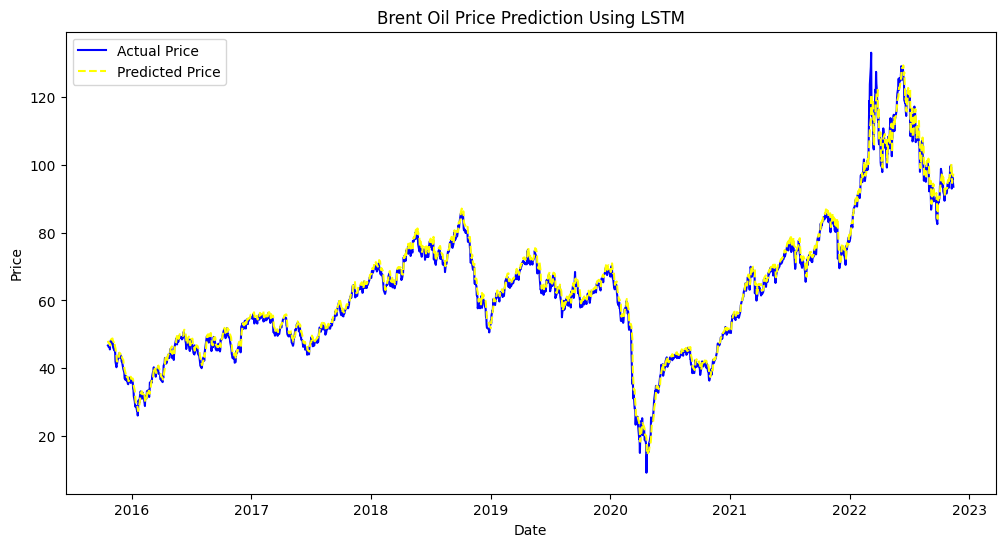

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(dates_test, y_test_actual, label="Actual Price", color='blue')
plt.plot(dates_test, y_pred_actual, label="Predicted Price", color='yellow', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Brent Oil Price Prediction Using LSTM")
plt.legend()
plt.show()